**Classification of the  Mnist handwritten digits dataset using CNN architecture**

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
1875/1875 [==============================] - 16s 4ms/step - loss: 0.1375 - accuracy: 0.9585 - val_loss: 0.0679 - val_accuracy: 0.9802
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0509 - accuracy: 0.9850 - val_loss: 0.0567 - val_accuracy: 0.9825
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0334 - accuracy: 0.9905 - val_loss: 0.0575 - val_accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0240 - accuracy: 0.9932 - val_loss: 0.0499 - val_accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0169 - accuracy: 0.9949 - val_loss: 0.0513 - val_accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0138 - accuracy: 0.9962 - val_loss: 0.0677 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - 

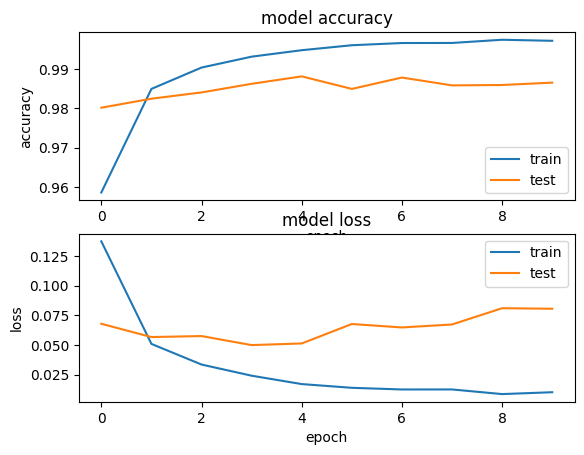

In [1]:
import matplotlib.pyplot as plt # plotting library
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
# import dataset
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from keras import utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train= X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test= X_test.reshape((X_test.shape[0], 28, 28, 1))
n_classes = 10
# convert to one-hot vector
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
#  resize and normalize
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32')  /255

# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',  input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# compiling the sequential model
#sgd = tf.keras.optimizers.SGD(lr=1e-1)
adam = tf.keras.optimizers.Adam(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=adam ,metrics=['accuracy'])

# training the model and saving metrics in history
history = model.fit(X_train, Y_train,epochs=10,validation_data=(X_test, Y_test))

# plotting
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')